

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether 
or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
> ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.<br>
 ● ‘Neighborhood’ indicates the location of the hospital.<br>
 ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
 ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 



In [73]:
#   Import needed packages for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [74]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [75]:
# check the shape of dataset, missing values and the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98768 entries, 0 to 98767
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       98768 non-null  float64
 1   AppointmentID   98768 non-null  int64  
 2   Gender          98768 non-null  object 
 3   ScheduledDay    98768 non-null  object 
 4   AppointmentDay  98767 non-null  object 
 5   Age             98767 non-null  float64
 6   Neighbourhood   98767 non-null  object 
 7   Scholarship     98767 non-null  float64
 8   Hipertension    98767 non-null  float64
 9   Diabetes        98767 non-null  float64
 10  Alcoholism      98767 non-null  float64
 11  Handcap         98767 non-null  float64
 12  SMS_received    98767 non-null  float64
 13  No-show         98767 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 10.5+ MB


In [76]:
# check if there ia any duplicated rows
sum(df.duplicated())

0

In [77]:
# drop nan values

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98767 entries, 0 to 98766
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       98767 non-null  float64
 1   AppointmentID   98767 non-null  int64  
 2   Gender          98767 non-null  object 
 3   ScheduledDay    98767 non-null  object 
 4   AppointmentDay  98767 non-null  object 
 5   Age             98767 non-null  float64
 6   Neighbourhood   98767 non-null  object 
 7   Scholarship     98767 non-null  float64
 8   Hipertension    98767 non-null  float64
 9   Diabetes        98767 non-null  float64
 10  Alcoholism      98767 non-null  float64
 11  Handcap         98767 non-null  float64
 12  SMS_received    98767 non-null  float64
 13  No-show         98767 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 11.3+ MB


## Check the range of different data

In the below section will check what are the range of values for each column. 

In [78]:
df.Neighbourhood.nunique()

81

In [79]:
df.Scholarship.unique()

array([0., 1.])

In [80]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [81]:
df.Hipertension.unique()

array([1., 0.])

In [82]:
df.Diabetes.unique()

array([0., 1.])

In [83]:
df.Alcoholism.unique()

array([0., 1.])

In [84]:
df.Handcap.unique()

array([0., 1., 2., 3., 4.])

In [85]:
df.SMS_received.unique()

array([0., 1.])

In [86]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)



### Data Cleaning 
Changes need to be done: <br>
    *change columns' names to make it more code friendly <br>
    *gender and no_show to be changed from string to 0 and 1. <br>
    *convert patient_id into str.<br>
    *Scholarship, Hipertension,Diabetes,Alcoholism, SMS_received, Handcap, Age to be changed into int.<br>
    *scheduledDay and AppointmentDay to change to date format. <br>

In [87]:
# Renaming column names to be more consistant and code friendly
new_labels = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighborhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']
df.columns = new_labels
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [88]:
#  convert gender and No_show to int values. for gender the changes will be (F=0, M=1),and for no_show it will be (No=0, Yes=1) 
dummies_columns = ['gender', 'no_show']
for c in dummies_columns:
    df[c]= pd.get_dummies(df[c], drop_first=True)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0


In [89]:
# convert Patient_id, gender , scholarship, hipertension, diabetes, alcoholism, sms_received, no_show to integer 
int_columns = ['gender', 'scholarship', 'hipertension','diabetes','alcoholism', 'sms_received', 'no_show','age','handcap']

for c in int_columns:
    df[c]= df[c].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98767 entries, 0 to 98766
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       98767 non-null  float64
 1   appointment_id   98767 non-null  int64  
 2   gender           98767 non-null  int32  
 3   scheduled_day    98767 non-null  object 
 4   appointment_day  98767 non-null  object 
 5   age              98767 non-null  int32  
 6   neighborhood     98767 non-null  object 
 7   scholarship      98767 non-null  int32  
 8   hipertension     98767 non-null  int32  
 9   diabetes         98767 non-null  int32  
 10  alcoholism       98767 non-null  int32  
 11  handcap          98767 non-null  int32  
 12  sms_received     98767 non-null  int32  
 13  no_show          98767 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(3)
memory usage: 7.9+ MB


In [90]:
#convert patient_id into string as it has no meaning to deal with it as a quantity
df.patient_id=df.patient_id.astype(str).apply(lambda x: x.split(".")[0])


In [91]:
#convert ScheduledDay and AppointmentDay to time format
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])

In [92]:
#check all data types are changed as required
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98767 entries, 0 to 98766
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   patient_id       98767 non-null  object             
 1   appointment_id   98767 non-null  int64              
 2   gender           98767 non-null  int32              
 3   scheduled_day    98767 non-null  datetime64[ns, UTC]
 4   appointment_day  98767 non-null  datetime64[ns, UTC]
 5   age              98767 non-null  int32              
 6   neighborhood     98767 non-null  object             
 7   scholarship      98767 non-null  int32              
 8   hipertension     98767 non-null  int32              
 9   diabetes         98767 non-null  int32              
 10  alcoholism       98767 non-null  int32              
 11  handcap          98767 non-null  int32              
 12  sms_received     98767 non-null  int32              
 13  no_show         

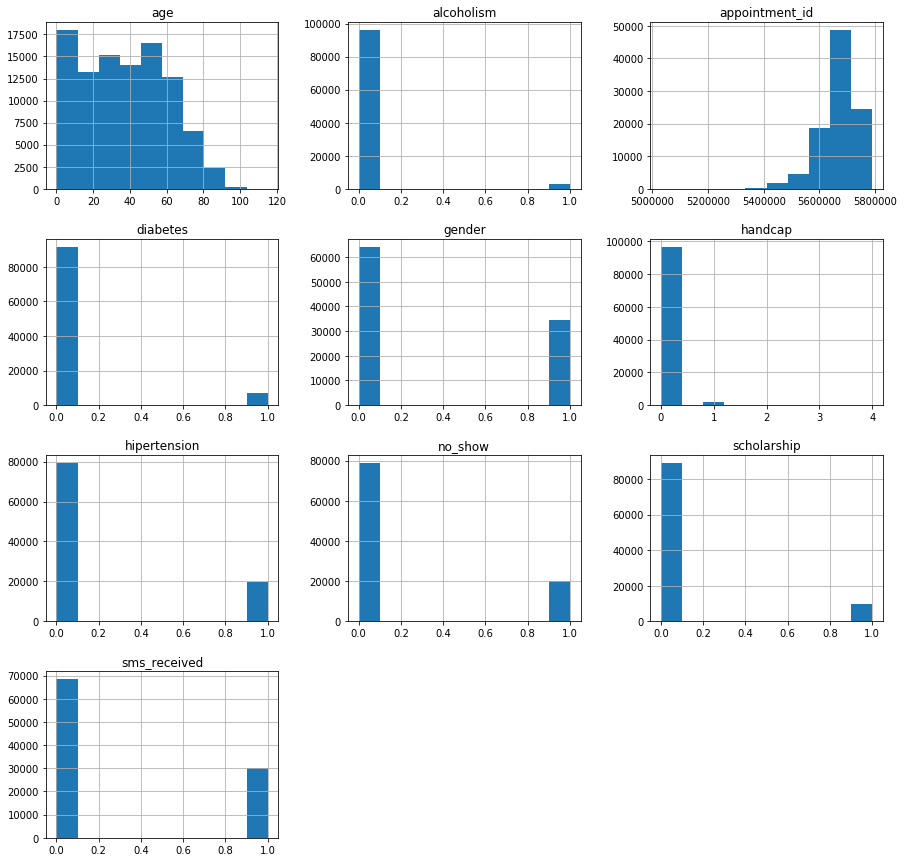

In [93]:
df.hist(figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 

>What is the proportions of show and no_show appointments?


Method 1:  calculate the proportion for show and no_show considering all columns

In [94]:
# separate the data into two sets one with patients show at their appointments and one without
#no_show=No=0 it means show
df_show=df[df['no_show']==0] 

#no_show=Yes=1 it means no_show
df_no_show=df[df['no_show']==1]

In [95]:
#calculate how many show and no_show in each data set
show_count=df_show['no_show'].value_counts()
no_show_count=df_no_show['no_show'].value_counts()


#calculate the proportion of no_show and show to the total
show_prop= show_count[0]/df.shape[0]
no_show_prop= no_show_count[1]/df.shape[0]
show_prop,no_show_prop



(0.7981208298318264, 0.20187917016817358)

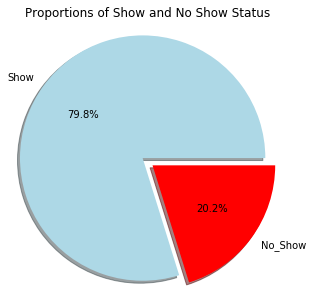

In [96]:
# plot the proportions of show and no show Status

# define data to plot
labels = ['Show', 'No_Show']
sizes = [show_prop, no_show_prop]
colors = ['lightblue', 'red']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Proportions of Show and No Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

Method 2:  calculate the proportion for show and no_show after dropping appointment_id, scheduled_day, appointment_day 

In [97]:
# check the shape of data before any modifications
df_show.shape, df_no_show.shape

((78828, 14), (19939, 14))

In [98]:
# check if there is a duplicated patient id
sum(df_show.patient_id.duplicated())


28245

In [99]:
#drop rows where all columns are identical for all columns except for appointment_id, scheduled_day, appointment_day 
# as these variables could be considered   not related to the patient behaviour
df_show_all= df_show.drop_duplicates(['patient_id','gender','age','neighborhood','hipertension', 'diabetes', 'alcoholism','handcap','neighborhood', 'scholarship','sms_received'])
df_nos_all= df_no_show.drop_duplicates(['patient_id','gender','age','neighborhood','hipertension', 'diabetes', 'alcoholism','handcap','neighborhood', 'scholarship','sms_received'])


In [100]:
# check the shape of data after modifications
df_show_all.shape, df_nos_all.shape

((58185, 14), (17378, 14))

In [101]:
#calculate how many show and no_show in each data set
show_count=df_show_all['no_show'].value_counts()
no_show_count=df_nos_all['no_show'].value_counts()


#calculate the proportion of no_show and show to the total
show_prop= show_count[0]/(show_count[0]+no_show_count[1])
no_show_prop= no_show_count[1]/(show_count[0]+no_show_count[1])
show_prop,no_show_prop

(0.7700197186453688, 0.22998028135463122)

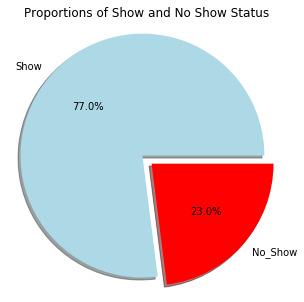

In [102]:
# define data to plot
labels = ['Show', 'No_Show']
sizes = [show_prop, no_show_prop]
colors = ['lightblue', 'red']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Proportions of Show and No Show Status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

###  Question 2
Is any of the patient's health conditions a determinant factor for showing or not showing status, What is the breakdown of health condition for show versus no_show?


In [103]:
#drop duplicated rows where patient id and all health conditions are true for show
df_show_id= df_show.drop_duplicates(['patient_id','hipertension', 'diabetes', 'alcoholism','handcap'])

In [104]:
# check the shape of data after the modifications

df_show.shape, df_show_id.shape

((78828, 14), (50583, 14))

In [105]:
# calculate the number of cases for each health condition for show status
health_cond = ['hipertension', 'diabetes', 'alcoholism','handcap']

health_cond_show = []

for hc in health_cond:
    hc_show = df_show_id.query(hc + ' > 0') # defined >0 instead of ==1 as handcap has values larger than 1
    health_cond_show.append(hc_show.shape[0])

hipertension_show, diabetes_show, alcoholism_show, handcap_show  = health_cond_show

# Need to find the total of all cases where a patient has at least one health condition: 
all_show_health = df_show_id.loc[(df_show.alcoholism > 0) | (df_show.handcap >0) | (df_show.hipertension > 0) | (df_show.diabetes >0)]
total_shows = all_show_health.shape[0]

#find the proportions of each health condition
health_show_prop= np.array(health_cond_show)/total_shows
health_show_prop



array([0.84885257, 0.30650487, 0.09864619, 0.07999009])

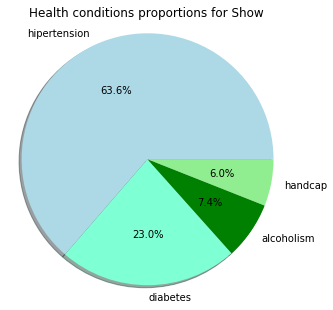

In [106]:
# define the data to plot for show results
labels = ['hipertension', 'diabetes', 'alcoholism','handcap']
sizes = health_show_prop
colors = ['lightblue', 'aquamarine', 'green','lightgreen']

# pie plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Health conditions proportions for Show')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

In [107]:
#drop rows where patient id and all health conditions are identical for no_show
df_nos_id= df_no_show.drop_duplicates(['patient_id','hipertension', 'diabetes', 'alcoholism','handcap'])
df_nos_id.shape

(16003, 14)

In [108]:
# calculate the number of cases for each health condition for no_show status

health_cond = ['hipertension', 'diabetes', 'alcoholism','handcap']

health_cond_no_show = []

for hc in health_cond:
    hc_no_show = df_nos_id.query(hc + ' > 0')
    health_cond_no_show.append(hc_no_show.shape[0])

hipertension_no_show, diabetes_no_show, alcoholism_no_show, handcap_no_show  = health_cond_no_show

# Need to find the total of all cases where a patient has one health condition or more: 
all_nos_health = df_nos_id.loc[(df_no_show.alcoholism > 0) | (df_no_show.handcap >0) | (df_no_show.hipertension > 0) | (df_no_show.diabetes >0)]
total_nos_health = all_nos_health.shape[0]


health_no_show_prop= np.array(health_cond_no_show)/total_nos_health
health_no_show_prop



array([0.8154673 , 0.31263064, 0.13765303, 0.07494775])

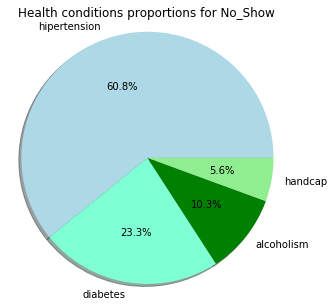

In [109]:
# define data to plot for no_show resuls
labels = ['hipertension', 'diabetes', 'alcoholism','handcap']
sizes = health_no_show_prop
colors =  ['lightblue', 'aquamarine', 'green','lightgreen']


# pie plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Health conditions proportions for No_Show')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

###  Question 3
Is the age and/or gender of the patient could be used as determent factor to predict show or no show status?

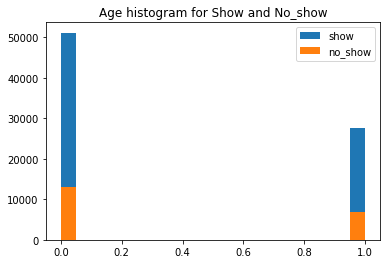

In [110]:
#plot gender histogram for show and no show F=0, M=1
bin_size= 20

gender_labels = ['show', 'no_show']
plt.hist(df_show.gender, bins=bin_size,label= gender_labels[0]);
plt.hist(df_no_show.gender, bins=bin_size,  label= gender_labels[1]);
plt.title('Age histogram for Show and No_show')
plt.legend()
plt.show()



Need to find the proportions of female and male for show and no show to be able to make decision from the data

In [111]:
#calculate gender proportion for show and no_show:
show_count=df_show['gender'].value_counts()
no_show_count=df_no_show['gender'].value_counts()


#calculate the proportion of each gender for no_show and show to the total
f_show_prop= show_count[0]/(show_count[0]+show_count[1])
m_show_prop= show_count[1]/(show_count[0]+show_count[1])

f_no_prop= no_show_count[0]/(no_show_count[0]+no_show_count[1])
m_no_prop= no_show_count[1]/(no_show_count[0]+no_show_count[1])

f_show_prop,m_show_prop,f_no_prop,m_no_prop

(0.6487923073019739,
 0.3512076926980261,
 0.655549425748533,
 0.34445057425146697)

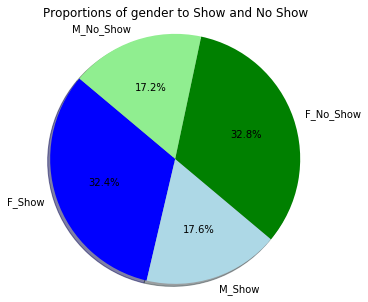

In [112]:
# define data to plot
labels = ['F_Show','M_Show','F_No_Show','M_No_Show']
sizes = [f_show_prop,m_show_prop,f_no_prop,m_no_prop]
colors = ['blue','lightblue','green','lightgreen']



# The plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportions of gender to Show and No Show')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

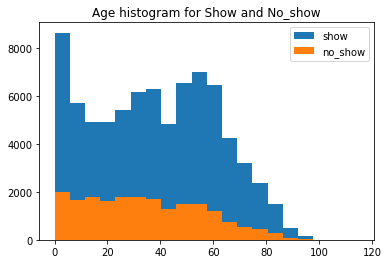

In [113]:
#plot the age histogram for show and no show 
bin_size= 20
age_labels = ['show', 'no_show']
plt.hist(df_show.age,bins=bin_size, label= age_labels[0]);
plt.hist(df_no_show.age, bins=bin_size, label= age_labels[1]);
plt.title('Age histogram for Show and No_show')
plt.legend()
plt.show()



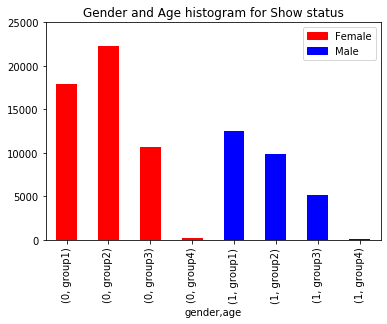

In [114]:
# as the age has values from 0 to 115 , will devide into 4 intervals where each group has interval of 117/4 ~= 29 years

df_show_a=df_show.drop(['patient_id','appointment_id','scheduled_day','appointment_day'], axis=1)
bin_edges=[-1,29,59,89,116]

bin_names=['group1','group2','group3','group4']

df_show_a['age']=pd.cut(df_show['age'],bin_edges, labels=bin_names)

#plot gender and age for both status to see how is the distribution 
df_show_a.groupby(['gender','age'])['no_show'].count().plot(kind='bar',  ylim=(0,25000), color=['red','red','red','red','blue','blue','blue','blue'])

plt.title('Gender and Age histogram for Show status')

red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')

plt.legend(handles=[red_patch, blue_patch])

Text(0.5, 1.0, 'Gender and Age histogram for No_Show status')

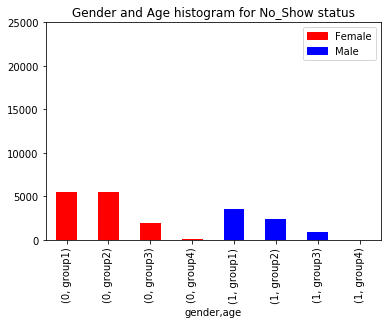

In [115]:
# repeat the same steps for no_show 
df_no_show_a=df_no_show.drop(['patient_id','appointment_id','scheduled_day','appointment_day'], axis=1)
bin_edges=[-1,29,59,89,116]
bin_names=['group1','group2','group3','group4']
df_no_show_a['age']=pd.cut(df_no_show['age'],bin_edges, labels=bin_names)
df_no_show_a.groupby(['gender','age'])['no_show'].count().plot(kind='bar', ylim=(0,25000), color=['red','red','red','red','blue','blue','blue','blue'])
plt.legend(handles=[red_patch, blue_patch])
plt.title('Gender and Age histogram for No_Show status')


<a id='conclusions'></a>
## Conclusions
>**Q1 What is the proportions of show and no_show appointments?**:<br>
The proportions of show and no_show to the total appointments were calculated using two methods, first one was calculated using all the variables without excluding any. The show percentage was around 80% and the no_show was around 20%. in the second method we tried to exclude the variables that are not reflecting the patient behaviour, which are: appointment_id, scheduled_day, appointment_day. the percentage of show dropped to 77% and the no_show increased to 23%.


> **Q2 Is the patient health condition a determinant factor for showing or not showing status, What is the breakdown of health condition for show versus no_show?**:<br> Percentages for different health conditions for both show and no show status were approximately the same. This means that we cannot depend on the health condition to determine if a patient will show or not.    

> **Q3 Is the age and gender of the patient could be used as determent factor to predict show or no show status?**: <br> The percentages for genders to show and not show are very similar. no correlation found.<br>
For age, both show and no_show rate decreased when age increased. again no clear correlation found.<br>
 combining age and gender, group 2 females seems more potential to show than other groups.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0